In [ ]:
#matplotlib inline
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [40]:
data1=pd.read_csv('coeffs.csv')
data2=pd.read_csv('vel.csv')


In [83]:
time=data1['Time']
CD=data1['CD']
CL=data1['CL']

CDfilter=CD[14000:]
mean1=np.mean(CD)
mean2=np.mean(CDfilter)
print('The mean value of CD without filter is = ',mean1)
print('The mean value of CD filtered from time step 6 to 20 is= ',mean2)
print('')

CLfilter=CL[14000:]
mean3=np.mean(CL)
mean4=np.mean(CLfilter)
print('The mean value of CD without filters is = ',mean3)
print('The mean value of CD filtered from time step 6 to 20 is= ',mean4)

The mean value of CD without filter is =  2.223389396492257
The mean value of CD filtered from time step 6 to 20 is=  2.5184235960408823

The mean value of CD without filters is =  -0.014572307769585919
The mean value of CD filtered from time step 6 to 20 is=  -0.002701947039876679


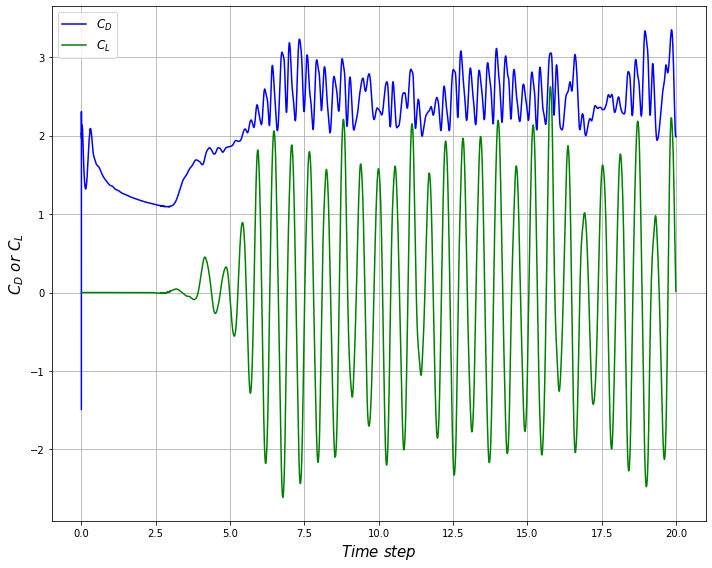

In [73]:
plt.figure(figsize=(10,8))
fig = plt.plot(data1['Time'],data1['CD'],color="blue",label='$C_D$')
fig = plt.plot(data1['Time'],data1['CL'],color="green",label='$C_L$')

plt.grid()
plt.legend(loc=0,fontsize=12)

plt.xlabel('$Time\ step$',fontsize='15')
plt.ylabel('$C_D\ or\ C_L$',fontsize='15')

plt.tight_layout()

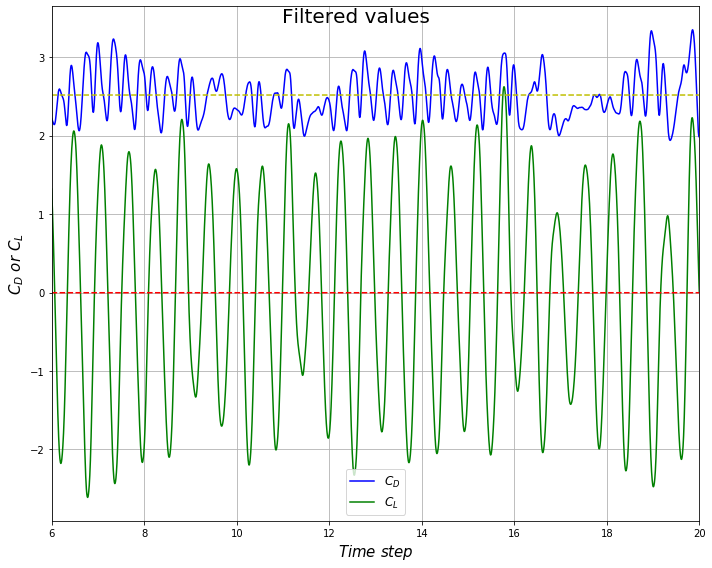

In [143]:
plt.figure(figsize=(10,8))
meanCL=[mean2]*20005
meanCD=[mean4]*20005
fig = plt.plot(data1['Time'],data1['CD'],color="blue",label='$C_D$')
fig = plt.plot(data1['Time'],data1['CL'],color="green",label='$C_L$')
fig = plt.plot(data1['Time'],(meanCL),'y--')
fig = plt.plot(data1['Time'],(meanCD),'r--')

plt.grid()
plt.legend(loc=0,fontsize=12)

axes = plt.gca()
axes.set_xlim([6,20])

plt.suptitle ('Filtered values', fontsize='20',color='black')

plt.xlabel('$Time\ step$',fontsize='15')
plt.ylabel('$C_D\ or\ C_L$',fontsize='15')

plt.tight_layout()


In [146]:
Shed_freq_l=24/14
Shed_freq_d=24/29

print('The lift shedding frequency is = ',Shed_freq_l)
print('The drag shedding frequency is = ',Shed_freq_d)

The lift shedding frequency is =  1.7142857142857142
The drag shedding frequency is =  0.8275862068965517


In [53]:
u=data2['U']
v=data2['V']
w=data2['W']

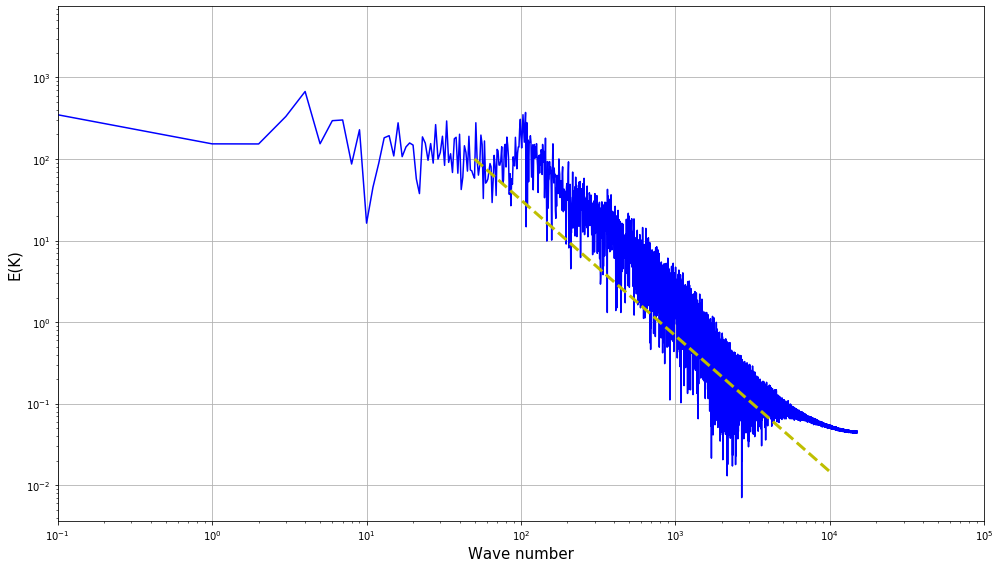

In [128]:
plt.figure(figsize=(14,8))
x1=data2['Time']
x=np.linspace(0.000120,30006,30000)

umean=np.mean(u)
vmean=np.mean(v)
wmean=np.mean(w)

uu=u-umean;
vv=v-vmean;
ww=w-wmean;

kk=0.5*(uu*uu+vv*vv+ww*ww)

yf=np.fft.rfft(kk)

pk1=100;
fk1=50;
a=pk1/fk1**(-5/3);

fk2=10000;
pk2=a*fk2**(-5/3);

a3=np.array([fk1,fk2]);
b3=np.array([pk1,pk2]);

plt.xlabel('Wave number',fontsize='15')
plt.ylabel('E(K)',fontsize='15')

plt.grid()

plt.semilogx()
plt.semilogy()
plt.xlim([0.1,100000])
plt.plot(x[0:len(yf)],abs(yf[0:len(yf)]),'b')

plt.plot(a3,b3,'y--',lw=3)

plt.tight_layout()

## Discussion and observations

I have loaded the lift and drag coefficient values in function of the time. To which I simply plotted, calculated the mean value and standard deviation.

As we can see clearly, the frequency of the lift is doubled to the drag, and the vortex shedding frequency was calculated manually by me, counting the number of peaks and using a fraction of the time step to the n of peaks, to which shows that the  lift vortex shedding is double compared to the drag.

The equations above made us able to plot also the E(K) in function of the wave number, to which we see that the behavior looks following the superimposed curve -5/3 if we start with E(K) around 10000 and wave number 50.

The simulation doesnt really seem statistically steady, as we can see from the plot of CL and CD, where they barely are periodic behaviors, especially in the drag coefficient. Although the time step taken seems to be constant, at least from  6 to 20.

As for major anomalies in the time signal, it seems to have a particularly weird behavior the area around time step 17 and 18, where the drag coefficient doesnt seem to oscillate alot, if not at all, having a very confusing behavior lacking peaks or periodicity.